<a href="https://colab.research.google.com/github/bieri2/ATMS-597-Project-4-Wx-Prediction/blob/master/GroupE_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Read in data

In [0]:
all_daily_data = pd.read_csv('/content/drive/My Drive/ATMS 597 Project 4/all_data_daily.csv', index_col = 'Timestamp')
all_3hr_data   = pd.read_csv('/content/drive/My Drive/ATMS 597 Project 4/all_data_3hr.csv', index_col = 'Timestamp')

## Prediction via regression

In [0]:
# Fill missing values using bfill() and ffill()
# Doing this because regression function does not handle NaNs
all_daily_data = all_daily_data.bfill().ffill()

In [0]:
# Define function to apply regression to input dataframes
def reg_predict(x, y, predict):
    model = LinearRegression(fit_intercept = True, normalize = True)  
    model.fit(x, y)
    train, predict = model.predict(x), model.predict(predict)
    return train, predict

In [0]:
# Get predicted values using training data (_predict) and predicted values for 2019 (_predict19) 
# 2019 predictions will be compared to 2019 observations
Tmax_predict, Tmax_predict19     = reg_predict(all_daily_data[['TMAXGFS']][:'2018-12-31'], 
                                               all_daily_data[['TMAXOBS']][:'2018-12-31'], all_daily_data[['TMAXGFS']]['2019-01-01':])
Tmin_predict, Tmin_predict19     = reg_predict(all_daily_data[['TMINGFS']][:'2018-12-31'],
                                               all_daily_data[['TMINOBS']][:'2018-12-31'], all_daily_data[['TMINGFS']]['2019-01-01':])
Wmax_predict, Wmax_predict19     = reg_predict(all_daily_data[['WMAXGFS']][:'2018-12-31'],
                                               all_daily_data[['WMAXOBS']][:'2018-12-31'], all_daily_data[['WMAXGFS']]['2019-01-01':])
Precip_predict, Precip_predict19 = reg_predict(all_daily_data[['RTOTGFS']][:'2018-12-31'],
                                               all_daily_data[['RTOTOBS']][:'2018-12-31'], all_daily_data[['RTOTGFS']]['2019-01-01':])

In [0]:
%matplotlib inline
sns.set_style('ticks')

# Define function to plot actual vs. predicted values
def plot_predict(time, actual, predicted, colors, legendloc, title, ylabel, ymin, ymax):

    plt.figure(figsize=(15,5))
    plt.plot(time, actual, color = colors[0], label = 'Observed')
    plt.plot(time, predicted, color = colors[1], alpha = 0.8, label = 'Predicted')
    # Add dashed vertical line to denote beginning of 2019
    plt.vlines(dt.datetime(2019, 1, 1), ymin, ymax, linestyles = 'dashed', alpha = 0.7)
    plt.legend(loc = legendloc)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Time')
    plt.xlim(time[0]-pd.Timedelta(days=1),  time[-1]+pd.Timedelta(days=1))
    plt.ylim(ymin, ymax)
    plt.show()

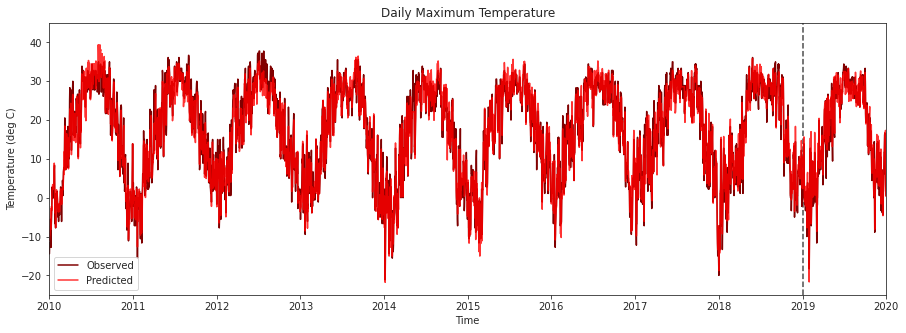

In [73]:
# Plot predicted vs. actual Tmax
Tmax_actual    = all_daily_data['TMAXOBS']
Tmax_predicted = np.concatenate((Tmax_predict, Tmax_predict19))
colors = ['maroon', 'red']
plot_predict(pd.to_datetime(all_daily_data.index), Tmax_actual, Tmax_predicted, colors, legendloc = 'lower left', 
             title = 'Daily Maximum Temperature', ylabel = 'Temperature (deg C)', 
             ymin = -25, ymax = 45)

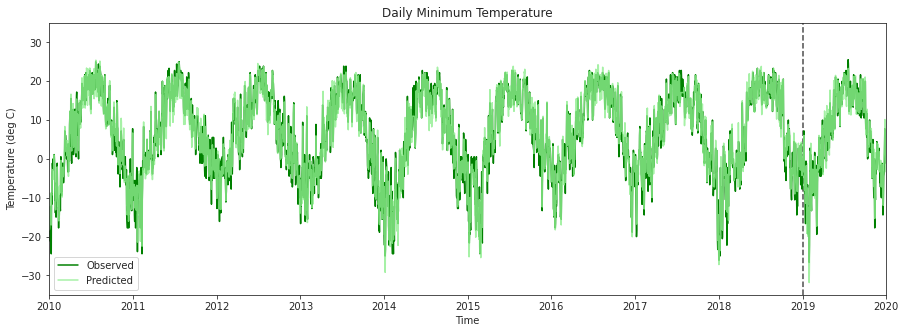

In [74]:
# Plot predicted vs. actual Tmin
Tmin_actual    = all_daily_data['TMINOBS']
Tmin_predicted = np.concatenate((Tmin_predict, Tmin_predict19))
colors = ['green', 'lightgreen']
plot_predict(pd.to_datetime(all_daily_data.index), Tmin_actual, Tmin_predicted, colors, legendloc = 'lower left', 
             title = 'Daily Minimum Temperature', ylabel = 'Temperature (deg C)', 
             ymin = -35, ymax = 35)

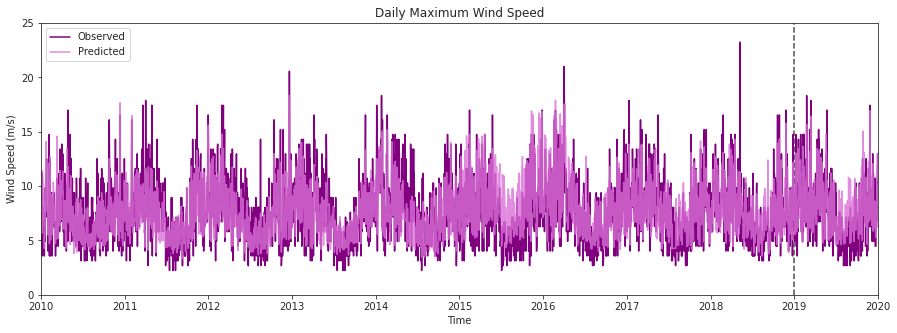

In [75]:
# Plot predicted vs. actual Wmax
Wmax_actual    = all_daily_data['WMAXOBS']
Wmax_predicted = np.concatenate((Wmax_predict, Wmax_predict19))
colors = ['purple', 'orchid']
plot_predict(pd.to_datetime(all_daily_data.index), Wmax_actual, Wmax_predicted, colors, legendloc = 'upper left', 
             title = 'Daily Maximum Wind Speed', ylabel = 'Wind Speed (m/s)', 
             ymin = 0, ymax = 25)

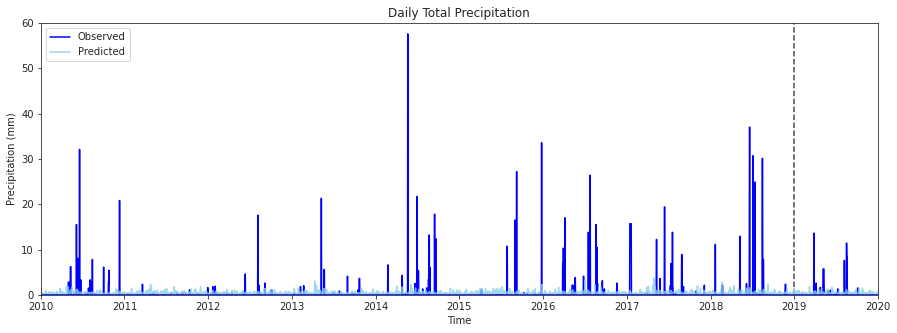

In [76]:
# Plot predicted vs. actual Precip
Precip_actual    = all_daily_data['RTOTOBS']
Precip_predicted = np.concatenate((Precip_predict, Precip_predict19))
colors = ['blue', 'skyblue']
plot_predict(pd.to_datetime(all_daily_data.index), Precip_actual, Precip_predicted, colors, legendloc = 'upper left', 
             title = 'Daily Total Precipitation', ylabel = 'Precipitation (mm)', 
             ymin = 0, ymax = 60)

In [0]:
# Define function to compute MSE for all predicted variables
def calc_mse(Tmax_actual, Tmax_predicted, Tmin_actual, Tmin_predicted,
              Wmax_actual, Wmax_predicted, Precip_actual, Precip_predicted):

    # Calculate MSE for each variable using sklearn function
    Tmax_mse   = mean_squared_error(Tmax_actual, Tmax_predicted)
    Tmin_mse   = mean_squared_error(Tmin_actual, Tmin_predicted)
    Wmax_mse   = mean_squared_error(Wmax_actual, Wmax_predicted)
    Precip_mse = mean_squared_error(Precip_actual, Precip_predicted)

    # Total MSE
    total_mse  = Tmax_mse + Tmin_mse + Wmax_mse + Precip_mse

    # Print to user
    print('Tmax error: {0:4.3f}'.format(Tmax_mse))
    print('Tmin error: {0:4.3f}'.format(Tmin_mse)) 
    print('Wmax error: {0:4.3f}'.format(Wmax_mse))
    print('Precip error: {0:4.3f}'.format(Precip_mse))
    print('Total error: {0:4.3f}'.format(total_mse))

In [78]:
calc_mse(Tmax_actual, Tmax_predicted, Tmin_actual, Tmin_predicted,
         Wmax_actual, Wmax_predicted, Precip_actual, Precip_predicted)

Tmax error: 5.222
Tmin error: 4.186
Wmax error: 2.928
Precip error: 6.594
Total error: 18.929
